In [27]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Load the dataset
netflix_data= pd.read_csv(r'C:\Users\WINDOWS\Downloads\netflix_titles_2021.csv\netflix_titles_2021.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [29]:
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [30]:
# Check the info of the dataset
netflix_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [31]:
netflix_data.shape # Check dataset shape

(8807, 12)

In [32]:
# Check for Duplication
netflix_data.duplicated().sum()

np.int64(0)

In [33]:
# Missing Values
netflix_data.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [34]:
# The percentage of missing values in each column
(netflix_data.isnull().sum()/(len(netflix_data)))*100


show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [35]:
# Replace null values with "Unknown" in specific columns
columns_to_fill = ['cast', 'country', 'date_added', 'rating',
'duration']
netflix_data[columns_to_fill] = netflix_data[columns_to_fill].fillna('Unknown')
# Now check if all null values are replaced
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [36]:
# Describe the dataset
netflix_data.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


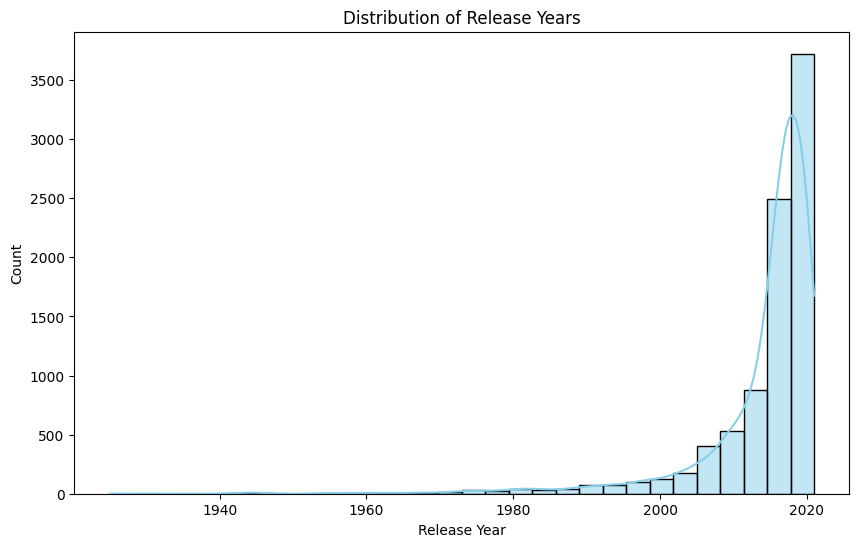

In [37]:
#HIstogram
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['release_year'], bins=30, kde=True,
color='skyblue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_92040\2351814419.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index,


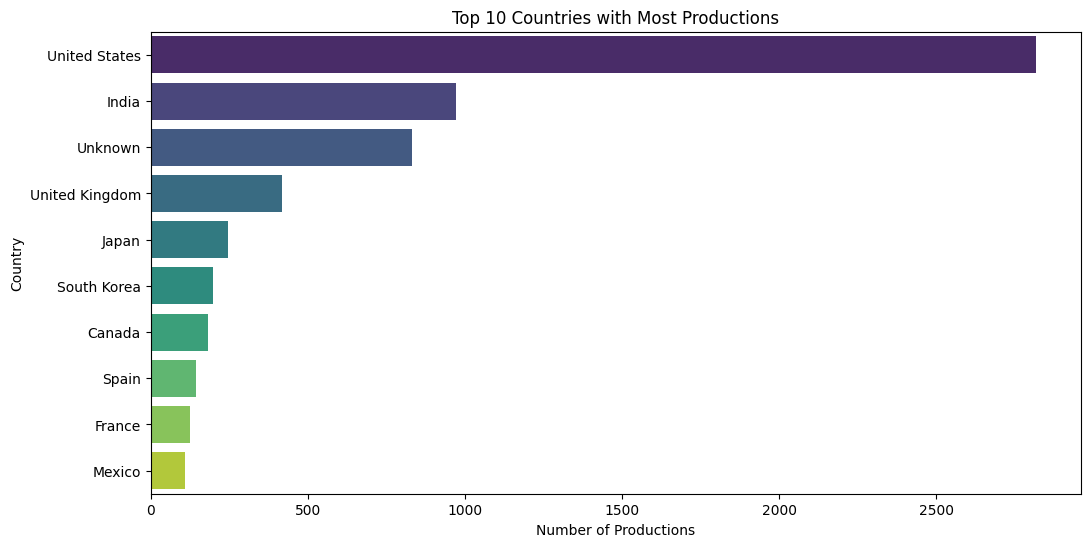

In [38]:
#barchart
top_countries = netflix_data['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index,
palette='viridis')
plt.title('Top 10 Countries with Most Productions')
plt.xlabel('Number of Productions')
plt.ylabel('Country')
plt.show()

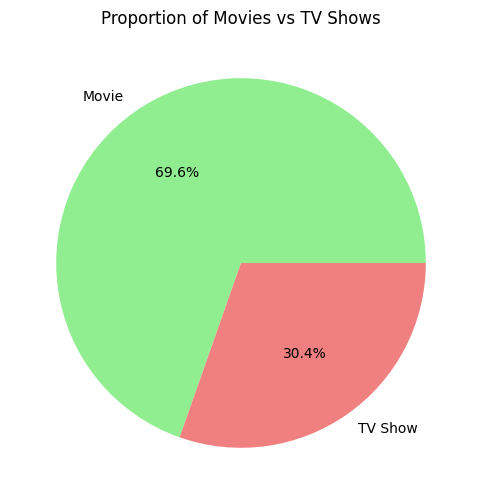

In [39]:
#Pie chart
content_types = netflix_data['type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(content_types, labels=content_types.index, autopct='%1.1f%%',
colors=['lightgreen', 'lightcoral'])
plt.title('Proportion of Movies vs TV Shows')
plt.show()

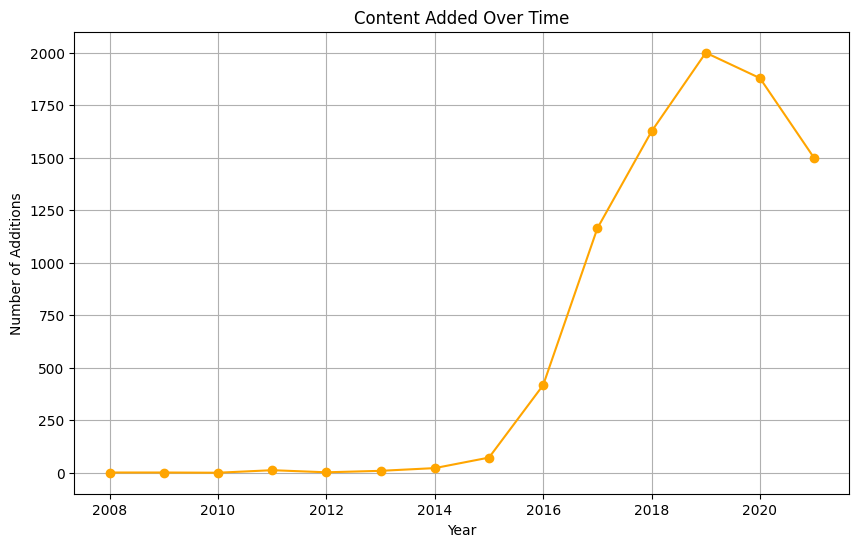

In [40]:
# Convert 'date_added' to datetime, handling errors gracefully
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'],
errors='coerce')
# Plotting line plot for date added over time
date_added_counts = netflix_data['date_added'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
date_added_counts.plot(kind='line', marker='o', color='orange')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Additions')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

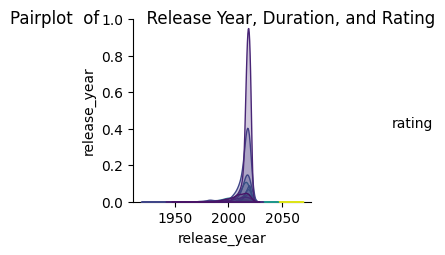

In [41]:
#Pairplot
plt.figure(figsize=(12, 6))
sns.pairplot(netflix_data[['release_year', 'duration', 'rating']],
hue='rating', palette='viridis')
plt.suptitle('Pairplot  of         Release Year, Duration, and Rating')
plt.show()


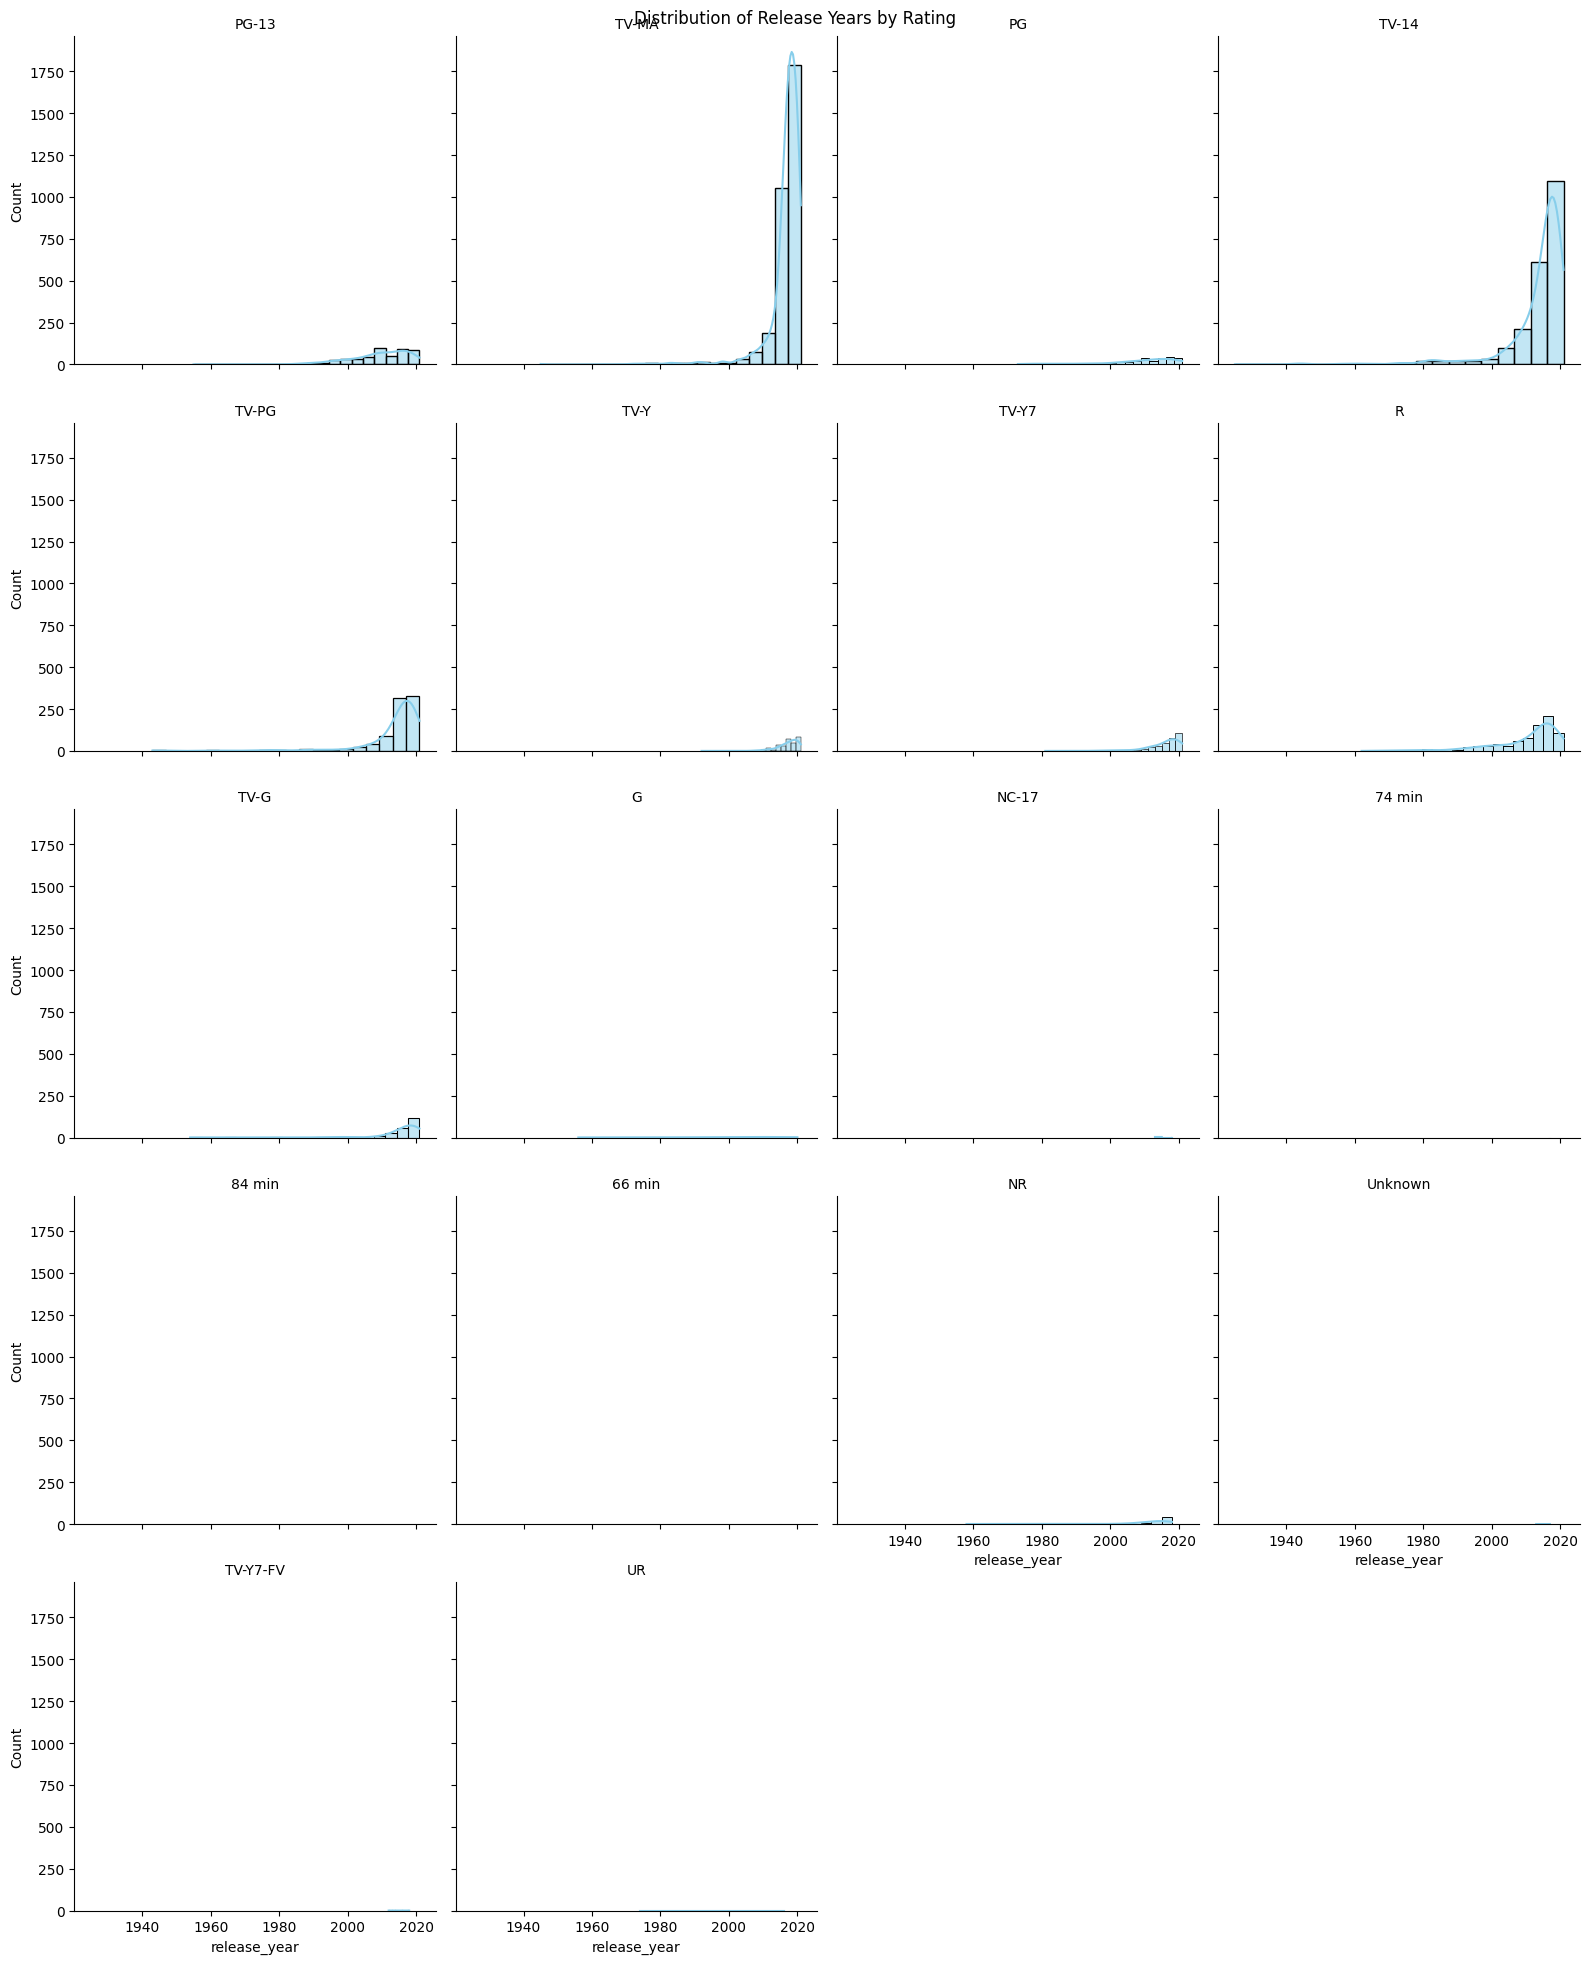

In [42]:
#fairset
g = sns.FacetGrid(netflix_data, col='rating', col_wrap=4, height=4)
g.map(sns.histplot, 'release_year', bins=20, color='skyblue', kde=True)
g.set_titles('{col_name}')
plt.suptitle('Distribution of Release Years by Rating')
plt.tight_layout()
plt.show()